# Computational Chemistry

This demonstration aims to introduce how Python can be applied in a Chemistry context. We will focus on reactions and kinetics, by utilising some datasets and analysing them to visualise trends.

The data used in this demo has been taken from this paper: https://www.nature.com/articles/s41557-023-01393-w (King-Smith, E., Berritt, S., Bernier, L. et al. Probing the chemical ‘reactome’ with high-throughput experimentation data. _Nat. Chem._ **16**, 633–643 (2024). https://doi.org/10.1038/s41557-023-01393-w), and the corresponding GitHub repository: https://github.com/emmaking-smith/HiTEA/blob/master/data/8_SEPT_APPROVED_full_dataset.csv (file used is `reaction_screening_data.csv`)

This demo makes use of High Throughput Experimentation (HTE) data, which is data that is produced from screening a very large number of chemical reactions, with varying conditions to determine the best reagents, catalysts and conditions to optimise reaction yield, selectivity and impurity control. Large numbers of experiments can be carried out in parallel, each experiment being done on a smaller scale than would be traditionally carried out.

In this demo we will look at a sample of this data and only filter it down to only focus on reactions between a combination of specific reactants, solvent and reagent, and see what catalyst would be most suited to it.

---

# How to use Jupyter

In Jupyter notebooks code can be run cell by cell. Cells are like textboxes which let you input code and comments, and the play button (⏵) lets you run cells individually. The fast forward button (⏩) lets you run the entire notebook. You can also press Shift+Enter to run cells individually.

Some of the cells can be run as they are and others will require you to input some code before running. It will be specified which you need to do.

## Reaction screening data

In this demo we will have a look at a dataset containing reaction data.

The reaction used is the Buchwald-Hartwig reaction, a type of coupling reaction with a palladium catalyst which forms C-N bonds.

<!-- A simplified diagram of the mechanism is shown here. You may not have seen a reaction mechanism that looks like this before, but essentially it consists of multiple steps and is a catalytic cycle, so the catalyst gets returned and the reactions can repeat multiple times. -->

<!-- ![Buchwald-Hartwig](buchwald_hartwig.jpg) -->

<!-- (image from paper by Gribanov, P. S., Philippova, A. N., Topchiy, M. A., Minaeva, L. I., Asachenko, A. F., & Osipov, S. N. (2022). General Method of Synthesis of 5-(Het)arylamino-1,2,3-triazoles via Buchwald–Hartwig Reaction of 5-Amino-or 5-Halo-1,2,3-triazoles. _Molecules_, **27**(6), 1999. https://doi.org/10.3390/MOLECULES27061999/S1) -->

A simplified equation of the reaction is shown here:

![Buchwald-Hartwig](buchwald_hartwig.png)

(image from textbook by Clayden, J., Greeves, N., & Warren, S. (2012). Organic chemistry. In Organic Chemistry (2nd ed., pp. 1092–1093). Oxford University Press. https://doi.org/10.1093/HESC/9780199270293.003.0040)

The Buchwald Hartwig reaction consists of several components:
- The starting material: ArX, and the product: ArNR$_2$. ArX essentially specifies a benzene (**ar**omatic) ring that is bonded to a halide (**X**). ArNR$_2$ specifies an amine consisting of a benzene ring (**Ar**) and 2 generic hydrocarbon (or **R**) groups bonded to the **N** atom.
- The catalyst: a Pd(0) complex such as Pd$_2$(dba)$_3$.
- Ligand: in this case it is P(o-tol)$_3$, which helps with the steps in the cycle
- Base: NaOt-Bu which drives the reaction and regenerates Pd(0) species
- Solvent: dioxane, which is often sued in Buchwald-Hartwig reactions as it dissolves both the aryl halide and base well and is non-coordinating.

In reality, this reaction is actually a cycle with multiple steps to generate the product as well as a catalytic species which is used up and regenerated. 

This is quite a bit beyond what is covered in A-level but if you would like to find out more about the reaction and its mechanism, have a look at the image `buchwald_hartwig.jpg` (from paper by Gribanov, P. S., Philippova, A. N., Topchiy, M. A., Minaeva, L. I., Asachenko, A. F., & Osipov, S. N. (2022). General Method of Synthesis of 5-(Het)arylamino-1,2,3-triazoles via Buchwald–Hartwig Reaction of 5-Amino-or 5-Halo-1,2,3-triazoles. _Molecules_, **27**(6), 1999. https://doi.org/10.3390/MOLECULES27061999/S1) and visit this link: https://www.sciencedirect.com/science/article/pii/S0022328X18301128.

First, we will import the _libraries_ that we require - these are pre-written packages that have various different functionalities. Most of them are imported in the format `import X as Y`, where `X` is the full name of the library and `Y` is an abbreviation for it - you can put anything you want as the name for `Y`, but there is normally a naming convention for each library, such as `pandas` being shortened to `pd`, to create consistency across code.

In [1]:
# Run this cell as it is
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import rdkit

You will notice that there is a _directory_ (folder) called "data". There are some files within it, which we will be analysing in this demo. They have been saved in a .csv (comma separated values) format, which makes it easy to process and clean if necessary.


The library we will be using to read in this data is called `pandas` which derives its name from the term _panel data_, used in econometrics to refer to multi-dimensional structured data, often involving measurements over time. There is a specific function to do read data in a .csv format, `read_csv()`.

In [2]:
# Run this cell as it is
data_filename = "data/reaction_screening_data.csv" # Create variable to store the filename
data = pd.read_csv(data_filename) # Read in the data using pandas

/tmp/ipykernel_1951/3745479835.py:3: DtypeWarning: Columns (26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_filename) # Read in the data using pandas


We have created a variable called `data` which contains a table of information that we have extracted from a file. We can preview the first few rows of the table using `.head()`.

In [3]:
data.head()

,Dataset entry number,ReactionClass,SCREEN_ID,NOTEBOOK_ID,REACTION_ID,KeyWord_STD,ReactionGroup,RXN_SMILES,PCAT_CMPD_ID,PRODUCT_STRUCTURE,...,Reactant_3_eq,Reactant_3_ID,reactant_3_SMILES,Reagent_1_eq,Reagent_1_ID,Reagent_1_Short_Hand,Reagent_2_eq,Reagent_2_ID,Reagent_2_Short_Hand,yie_react
0,15408,Alkylation,SCRN_11,00119131-2953,RKB-04072174,ALKYLATION,Lewis Acid Base Screening,[F:1][c:2]1[c:11]([c:7]2[cH:6][c:4]([Br:5])[cH...,PF-07225965,Cn1ncc2cc(Br)cc(F)c12,...,1.0,NaN,NaN,3.0,MFCD00006493,PMP,NaN,NaN,NaN,20__MFCD18381159__MFCD00008416__
1,16887,Alkylation,SCRN_11,00119131-2953,RKB-04072175,ALKYLATION,Lewis Acid Base Screening,[F:1][c:2]1[c:11]([c:7]2[cH:6][c:4]([Br:5])[cH...,PF-07225965,Cn1ncc2cc(Br)cc(F)c12,...,1.0,NaN,NaN,3.0,MFCD00003920,PS,NaN,NaN,NaN,19__MFCD18381159__MFCD00008416__
2,16888,Alkylation,SCRN_11,00119131-2953,RKB-04072176,ALKYLATION,Lewis Acid Base Screening,[CH3:1]OS(OC)(=O)=O.[F:2][c:3]1[c:12]([c:8]2[c...,PF-07225965,Cn1ncc2cc(Br)cc(F)c12,...,1.0,NaN,NaN,3.0,MFCD00011382,K2CO3(aq.),NaN,NaN,NaN,19__MFCD18381159__MFCD00008416__
3,16889,Alkylation,SCRN_11,00119131-2953,RKB-04072177,ALKYLATION,Lewis Acid Base Screening,[F:1][c:2]1[c:11]([c:7]2[cH:6][c:4]([Br:5])[cH...,PF-07225965,Cn1ncc2cc(Br)cc(F)c12,...,1.0,NaN,NaN,3.0,MFCD10567040,CsOPiv,NaN,NaN,NaN,19__MFCD18381159__MFCD00008416__
4,17100,Alkylation,SCRN_11,00119131-2953,RKB-04072178,ALKYLATION,Lewis Acid Base Screening,[F:1][c:2]1[c:11]([c:7]2[cH:6][c:4]([Br:5])[cH...,PF-07225965,Cn1ncc2cc(Br)cc(F)c12,...,1.0,NaN,NaN,3.0,MFCD00003510,Na3PO4,NaN,NaN,NaN,18__MFCD18381159__MFCD00008416__


We can see that the dataset contains a lot of columns (45 to be exact!). To simplify this, most of the columns won't be used in this demo, but the ones that are relevant to us are: 
- Dataset entry number - a unique identifier for each row of the dataset
- PRODUCT_STRUCTURE - shows the SMILES string of the product (more info on this later)
- Reactant_1_ID: chemical name of the reactant
- Reactant_2_ID: chemical name of the reactant
- Solvent_1_Name: solvent that the reaction was carried out in
- Reagent_1_Short_Hand: the reagent used (this is added to cause a reaction, but unlike a reactant it is not consumed)
- Product_Yield_PCT_Area_UV: this is a way of calculating the product yield based on its peak area relative to the UV detected peak area of a HPLC (high-performance liquid chromatography) chromatogram
- Product_Yield_Mass_Ion_Count: the yield from the intensity of the mass spectrometer's signals corresponding to the product

The details of these measures of product yield are not too important to focus on for this demo, but you can read more about them if you wish.

We can see from the first few rows that the dataset contains many different reaction classes, not just the Buchwald-Hartwig reaction, so we need to do something called _filtering_ to only keep the data relevant to us - this code only keeps the rows of data in which the column `"KeyWord_STD"` has the value of `"BUCHWALD"`.

In [4]:
data_filtered = data[data["KeyWord_STD"] == "BUCHWALD"]
data_filtered = data_filtered.dropna(subset = ["Reagent_1_Short_Hand"])
# data_buchwald.to_csv("data/buchwald.csv", sep = ",", index = False)

Let's have another look at our filtered dataset:

In [5]:
data_filtered.head()

,Dataset entry number,ReactionClass,SCREEN_ID,NOTEBOOK_ID,REACTION_ID,KeyWord_STD,ReactionGroup,RXN_SMILES,PCAT_CMPD_ID,PRODUCT_STRUCTURE,...,Reactant_3_eq,Reactant_3_ID,reactant_3_SMILES,Reagent_1_eq,Reagent_1_ID,Reagent_1_Short_Hand,Reagent_2_eq,Reagent_2_ID,Reagent_2_Short_Hand,yie_react
15571,38518,Pd coupling,SCRN_100,00119131-2462,RKB-03773597,BUCHWALD,Metal Mediated,[CH3:1][CH2:2][O:3][C:4]([c:6]1[c:10]([OH:11])...,PF-07036396,CCOC(=O)c1cn(nc1O)c2ccc3ncccc3c2,...,NaN,NaN,NaN,3.0,MFCD00008261,LiHMDS,NaN,NaN,NaN,0__PF-01041290__MFCD00024023__
15572,38519,Pd coupling,SCRN_100,00119131-2462,RKB-03773598,BUCHWALD,Metal Mediated,[CH3:1][CH2:2][O:3][C:4]([c:6]1[c:10]([OH:11])...,PF-07036396,CCOC(=O)c1cn(nc1O)c2ccc3ncccc3c2,...,NaN,NaN,NaN,3.0,MFCD00008261,LiHMDS,NaN,NaN,NaN,0__PF-01041290__MFCD00024023__
15573,38520,Pd coupling,SCRN_100,00119131-2462,RKB-03773599,BUCHWALD,Metal Mediated,Br[c:1]1[cH:10][c:9]([c:4]2[cH:3][cH:2]1)[cH:8...,PF-07036396,CCOC(=O)c1cn(nc1O)c2ccc3ncccc3c2,...,NaN,NaN,NaN,3.0,MFCD00008261,LiHMDS,NaN,NaN,NaN,0__PF-01041290__MFCD00024023__
15574,38521,Pd coupling,SCRN_100,00119131-2462,RKB-03773600,BUCHWALD,Metal Mediated,[CH3:1][CH2:2][O:3][C:4]([c:6]1[c:10]([OH:11])...,PF-07036396,CCOC(=O)c1cn(nc1O)c2ccc3ncccc3c2,...,NaN,NaN,NaN,3.0,MFCD00008261,LiHMDS,NaN,NaN,NaN,0__PF-01041290__MFCD00024023__
15575,38522,Pd coupling,SCRN_100,00119131-2462,RKB-03773601,BUCHWALD,Metal Mediated,[CH3:1][CH2:2][O:3][C:4]([c:6]1[c:10]([OH:11])...,PF-07036396,CCOC(=O)c1cn(nc1O)c2ccc3ncccc3c2,...,NaN,NaN,NaN,3.0,MFCD00008261,LiHMDS,NaN,NaN,NaN,0__PF-01041290__MFCD00024023__


For convenience, this filtered dataset has been saved into another `.csv` file called `buchwald.csv`, so that it is easier to access. Let's read in this file:

In [6]:
data_buchwald_hartwig_filename = "data/buchwald_hartwig.csv" # Create variable to store the filename
data_buchwald_hartwig = pd.read_csv(data_buchwald_hartwig_filename)

In [7]:
data_buchwald_hartwig.head()

,Dataset entry number,ReactionClass,SCREEN_ID,NOTEBOOK_ID,REACTION_ID,KeyWord_STD,ReactionGroup,RXN_SMILES,PCAT_CMPD_ID,PRODUCT_STRUCTURE,...,Reactant_3_eq,Reactant_3_ID,reactant_3_SMILES,Reagent_1_eq,Reagent_1_ID,Reagent_1_Short_Hand,Reagent_2_eq,Reagent_2_ID,Reagent_2_Short_Hand,yie_react
0,38518,Pd coupling,SCRN_100,00119131-2462,RKB-03773597,BUCHWALD,Metal Mediated,[CH3:1][CH2:2][O:3][C:4]([c:6]1[c:10]([OH:11])...,PF-07036396,CCOC(=O)c1cn(nc1O)c2ccc3ncccc3c2,...,NaN,NaN,NaN,3.0,MFCD00008261,LiHMDS,NaN,NaN,NaN,0__PF-01041290__MFCD00024023__
1,38519,Pd coupling,SCRN_100,00119131-2462,RKB-03773598,BUCHWALD,Metal Mediated,[CH3:1][CH2:2][O:3][C:4]([c:6]1[c:10]([OH:11])...,PF-07036396,CCOC(=O)c1cn(nc1O)c2ccc3ncccc3c2,...,NaN,NaN,NaN,3.0,MFCD00008261,LiHMDS,NaN,NaN,NaN,0__PF-01041290__MFCD00024023__
2,38520,Pd coupling,SCRN_100,00119131-2462,RKB-03773599,BUCHWALD,Metal Mediated,Br[c:1]1[cH:10][c:9]([c:4]2[cH:3][cH:2]1)[cH:8...,PF-07036396,CCOC(=O)c1cn(nc1O)c2ccc3ncccc3c2,...,NaN,NaN,NaN,3.0,MFCD00008261,LiHMDS,NaN,NaN,NaN,0__PF-01041290__MFCD00024023__
3,38521,Pd coupling,SCRN_100,00119131-2462,RKB-03773600,BUCHWALD,Metal Mediated,[CH3:1][CH2:2][O:3][C:4]([c:6]1[c:10]([OH:11])...,PF-07036396,CCOC(=O)c1cn(nc1O)c2ccc3ncccc3c2,...,NaN,NaN,NaN,3.0,MFCD00008261,LiHMDS,NaN,NaN,NaN,0__PF-01041290__MFCD00024023__
4,38522,Pd coupling,SCRN_100,00119131-2462,RKB-03773601,BUCHWALD,Metal Mediated,[CH3:1][CH2:2][O:3][C:4]([c:6]1[c:10]([OH:11])...,PF-07036396,CCOC(=O)c1cn(nc1O)c2ccc3ncccc3c2,...,NaN,NaN,NaN,3.0,MFCD00008261,LiHMDS,NaN,NaN,NaN,0__PF-01041290__MFCD00024023__


_SMILES strings_ (which are like the structural formula of a compound) are a useful way to determine structures of molecules. 

We can see that from the first few rows, reactant 1 is given as "`MFCD00006493`", which does not tell us much. However, we can look up its SMILES string and use the RDKit library to extract its molecular structure using the function `rdkit.Chem.MolFromSmiles()`.

Here we will extract the individual column from the database (`PRODUCT_STRUCTURE`), which gives us the SMILES string. 

We're going to save out the results for both reactants to a separate name, or _variable_, for easier access.

In [8]:
# Create variable for the PRODUCT_STRUCTURE column in the dataframe
PRODUCT_STRUCTURE = data_buchwald_hartwig["PRODUCT_STRUCTURE"]

A bit like with coordinates on a graph, as we now have a variable for this particular column, we can now extract a particular row in this column to find a particular product's structure. Python uses 0-indexing, meaning that it starts counting from 0 not 1, so to access the product structure in the first row we use 0, denoted in square brackets `[]`.

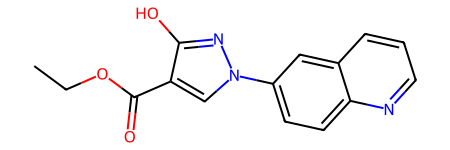

In [9]:
product = PRODUCT_STRUCTURE[0]
rdkit.Chem.MolFromSmiles(product)

It seems that this structure is a bit more complicated than the generic structure given in the simplified equation, however the aromatic ring and amine group is present. The aromatic ring does not necessarily have to be a benzene ring.

**Question (1): Use the code above to extract the product of row index 500 then use the `rdkit.Chem.MolFromSmiles()` function to find its display formula.**

*Add some text to the cell below and press the &#9205; Run button (play symbol). To run all the cells again in order press the &#9193; button (fast-forward symbol) and then select the red "Restart and Run All Cells" option.*

In [10]:
## ADD TEXT HERE


Here we will now extract individual columns from the dataset for reactant 1 and reactant 2, and as before we're going to save out the results for the reactants, solvent, catalyst and reagent to two separate names for easier access:

In [11]:
Reactant_1_ID = data_buchwald_hartwig["Reactant_1_ID"]
Reactant_2_ID = data_buchwald_hartwig["Reactant_2_ID"]
Solvent_1_Name = data_buchwald_hartwig["Solvent_1_Name"]
Catalyst_2_Short_Hand = data_buchwald_hartwig["Catalyst_2_Short_Hand"]
Reagent_1_Short_Hand = data_buchwald_hartwig["Reagent_1_Short_Hand"]

We can also do something called _filtering_, where we can extract the data from a particular column that only meets the conditions we pose.

For example, from looking at the data in the original file, we can see there are _a lot_ of different reactant 1s, reactant 2s, solvents and reagents. We can filter out the data so that the only reactant 1 present is `PF-05314903`, the only reactant 2 present is `MFCD03419272`, the only solvent present is `Dioxane` and the only reagent present is `LiOBut`. This means we can compare how the different catalysts used affect yield without worrying about any other factors as they are kept the same.

In [12]:
# Use of filtering - note that "&" means AND and ensures that only the data that meets all three conditions will be extracted
r1 = Reactant_1_ID[(Reactant_1_ID == "PF-05314903") & (Reactant_2_ID == "MFCD03419272") & (Solvent_1_Name == "Dioxane") & (Reagent_1_Short_Hand == "LiOBut")]
r2 = Reactant_2_ID[(Reactant_1_ID == "PF-05314903") & (Reactant_2_ID == "MFCD03419272") & (Solvent_1_Name == "Dioxane") & (Reagent_1_Short_Hand == "LiOBut")]

We will do the same for the reagent and product yield columns - for now we will use the `Product_Yield_PCT_Area_UV` column as our measure for the yield:

In [13]:
Catalyst_2_Short_Hand = data_buchwald_hartwig["Catalyst_2_Short_Hand"]
catalyst = Catalyst_2_Short_Hand[(Reactant_1_ID == "PF-05314903") & (Reactant_2_ID == "MFCD03419272") & (Solvent_1_Name == "Dioxane") & (Reagent_1_Short_Hand == "LiOBut")]
Product_Yield_PCT_Area_UV = data_buchwald_hartwig["Product_Yield_PCT_Area_UV"]
yield_uv = Product_Yield_PCT_Area_UV[(Reactant_1_ID == "PF-05314903") & (Reactant_2_ID == "MFCD03419272") & (Solvent_1_Name == "Dioxane") & (Reagent_1_Short_Hand == "LiOBut")]

In [14]:
data_buchwald_hartwig[(Reactant_1_ID == "PF-05314903") & (Reactant_2_ID == "MFCD03419272") & (Solvent_1_Name == "Dioxane") & (Reagent_1_Short_Hand == "LiOBut")].to_csv("data/filtered.csv", sep = ",")

There are many ways to visualise data in Python (e.g. line graphs, scatter plots, bar charts), depending on what type of data you have. There are multiple different libraries that can be used to plot these graphs but as an example we will use `seaborn`. `seaborn` is a library for making statistical graphics - it builds on top of `matplotlib` and integrates closely with `pandas` data structures (more information available in [documentation](https://seaborn.pydata.org/tutorial/introduction)).

Here we are comparing the type of reagent (a `string` data type) with the yield (a `float` data type) and there is a 1:1 ratio between the each ligands used and the number of experiments run with each one. Therefore, it is best to use a bar chart. We can use the `bar()` function from `matplotlib` to do this, but there are also other ways too, such as [`barplot()` using the `seaborn` library](https://seaborn.pydata.org/generated/seaborn.barplot.html), which gives a similar result.

Let's try to plot this as a whole:

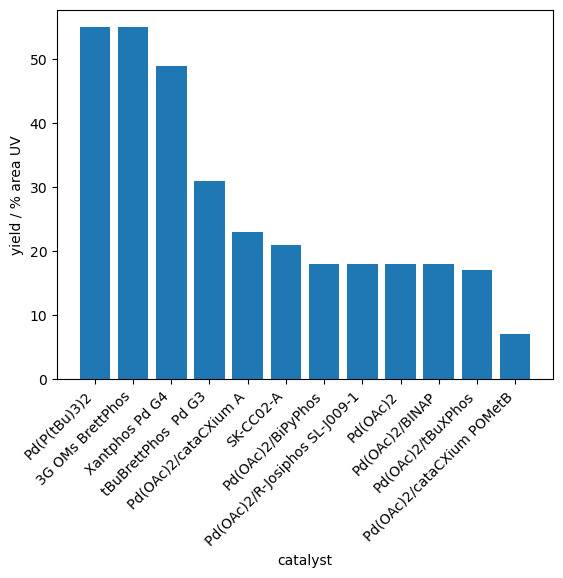

In [15]:
plt.bar(catalyst, yield_uv)
plt.xlabel("catalyst")
plt.ylabel("yield / % area UV")
plt.xticks(rotation = 45, ha = 'right') # this part just rotates the x axis labels so that they don't overlap and can be read properly
plt.show()

**Question (2): Which catalyst(s) seems to get the best yield here?**

*Discuss in groups*

We can now do the same thing but using the `Product_Yield_Mass_Ion_Count` column as our measure for yield, and see how this compares.

In [16]:
Product_Yield_Mass_Ion_Count = data_buchwald_hartwig["Product_Yield_Mass_Ion_Count"]
yield_ion = Product_Yield_Mass_Ion_Count[(Reactant_1_ID == "PF-05314903") & (Reactant_2_ID == "MFCD03419272") & (Solvent_1_Name == "Dioxane") & (Reagent_1_Short_Hand == "LiOBut")]

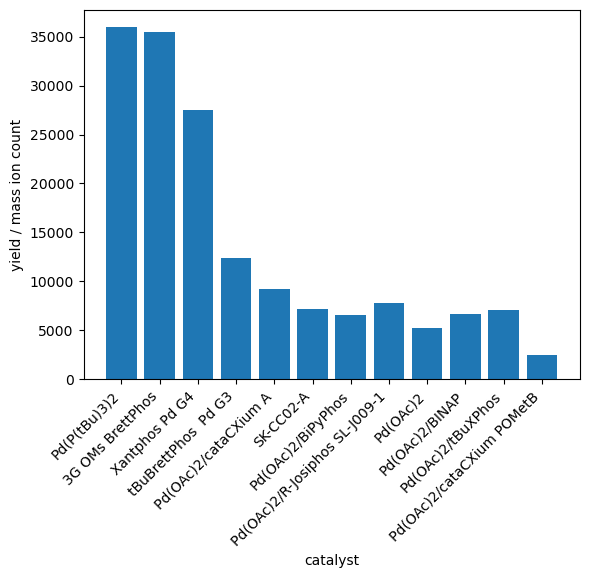

In [17]:
plt.bar(catalyst, yield_ion)
plt.xlabel("catalyst")
plt.ylabel("yield / mass ion count")
plt.xticks(rotation = 45, ha = 'right') # this part just rotates the x axis labels so that they don't overlap and can be read properly
plt.show()

**Question (3): Does the same catalyst(s) give the best yield for this graph too? How do the data from the different measures of yield differ?**

*Discuss in groups*